In [1]:
import tigramite 
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import os

#tigramite imports

import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import sklearn

import tigramite
from tigramite import data_processing as pp
from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.independence_tests import ParCorr, GPDC, CMIknn, CMIsymb

First very basic version

In [3]:
def calculateResults(Data, Mask, Method, Test):
    data = np.load(Data)
    if (Mask != "none"):
        mask = np.load(Mask)
        dataframe = pp.DataFrame(data, mask=mask)
    else:
        dataframe = pp.DataFrame(data)
    cond_ind_test = getCondIndTest(Test)
    global pcmci
    pcmci = PCMCI(
        dataframe=dataframe, 
        cond_ind_test=cond_ind_test,
        verbosity=1)
    global results 
    if (Method=="PCMCI"):
        results = pcmci.run_pcmci(tau_max=8, pc_alpha=None)
    elif (Method == "PCMCI+"):
        results = pcmci.run_pcmciplus()
    return True

In [4]:
def makePlot(plot_type):
    try:
        q_matrix = pcmci.get_corrected_pvalues(p_matrix=results['p_matrix'], fdr_method='fdr_bh')
        var_names = [r'$X^0$', r'$X^1$', r'$X^2$', r'$X^3$']
        """pcmci.print_significant_links(
                p_matrix = results['p_matrix'], 
                q_matrix = q_matrix,
                val_matrix = results['val_matrix'],
                alpha_level = 0.01)"""
        link_matrix = pcmci.return_significant_links(pq_matrix=q_matrix,
                        val_matrix=results['val_matrix'], alpha_level=0.01)['link_matrix']
        if plot_type=="Process Graph":
            tp.plot_graph(
                val_matrix=results['val_matrix'],
                link_matrix=link_matrix,
                var_names=var_names,
                link_colorbar_label='cross-MCI',
                node_colorbar_label='auto-MCI',
            )
            plt.show()
        elif plot_type=="Time series graph":
            tp.plot_time_series_graph(
                figsize=(6, 4),
                val_matrix=results['val_matrix'],
                link_matrix=link_matrix,
                var_names=var_names,
                link_colorbar_label='MCI',
                )
            plt.show()
        elif plot_type=="Lagged Correlation":
            correlations = pcmci.get_lagged_dependencies(tau_max=20, val_only=True)['val_matrix']
            lag_func_matrix = tp.plot_lagfuncs(val_matrix=correlations, setup_args={'var_names':var_names, 
                                    'x_base':5, 'y_base':.5})
            plt.show()
        else: 
            print("This should not be possible!")
    except Exception as e:
        print("Something went wrong here! Try executing the first part")
        print(e.message)
            
    return True
    

In [5]:
def getCondIndTest(Test):
    print(Test)
    if (Test == "ParCorr"):
        return ParCorr(significance='analytic')
    elif (Test == "GPDC"):
        return GPDC()
    elif (Test == "CMIknn"):
        return CMIknn()
    elif (Test == "CMIsymb"):
        return CMIsymb()
    else:
        raise Exception("Something is not right here.")

In [6]:
# widgets
print(os.getcwd())
listDir = []
for entry in os.scandir(os.getcwd()):
    listDir.append(entry.name)
listDir.append("none")
example_widget = widgets.Dropdown(
    options=listDir,#os.scandir(os.getcwd()),#.append("none"),
    value='none',
    description='Number:',
    disabled=False,
)
data_upload_widget = widgets.Dropdown(
    options=listDir,#os.scandir(os.getcwd()),#.append("none"),
    value='none',
    description='Data:',
    disabled=False
)

mask_upload_widget = widgets.Dropdown(
    options=listDir,#os.scandir(os.getcwd()),#.append("none"),
    value='none',
    description='Mask:',
    disabled=False,
)
method_widget = widgets.Dropdown(
    options=["PCMCI", "PCMCI+"],
    value="PCMCI",
    description="Method:",
    disabled=False
)
test_widget = widgets.Dropdown(
    options=["ParCorr", "GPDC", "CMIknn", "CMIsymb", "OracleCI"],
    value="ParCorr",
    description="CI Test:",
    disabled=False
)

plots_widget = widgets.Dropdown(
    options=["Process Graph", "Time series graph", "Lagged Correlation"],
    value="Process Graph",
    description="Plot:",
    disabled=False,
    continuous_update=True,
    
)


C:\Users\rosem\Documents\WS 2021\BA\Prototype


AppLayout(children=(Button(button_style='success', description='Header', layout=Layout(grid_area='header', hei…

ParCorr

##
## Step 1: PC1 algorithm with lagged conditions
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 1
pc_alpha = [0.01]
max_conds_dim = None
max_combinations = 1



## Resulting lagged parent (super)sets:

    Variable 0 has 2 parent(s):
        (0 -1): max_pval = 0.00000, min_val =  0.948
        (1 -1): max_pval = 0.00000, min_val = -0.829

    Variable 1 has 2 parent(s):
        (1 -1): max_pval = 0.00000, min_val =  0.765
        (3 -1): max_pval = 0.00000, min_val =  0.486

    Variable 2 has 3 parent(s):
        (1 -1): max_pval = 0.00000, min_val =  0.514
        (2 -1): max_pval = 0.00000, min_val =  0.491
        (0 -1): max_pval = 0.00000, min_val = -0.157

    Variable 3 has 1 parent(s):
        (3 -1): max_pval = 0.00000, min_val =  0.396

##
## Step 2: PC algorithm with contemp. conditions and MCI tests
##

Parameters:

independence test = par_corr
tau_min = 0
tau_max = 1
pc_alpha = 0.01
contemp_collider_rule = majority
conflict_resolution = True

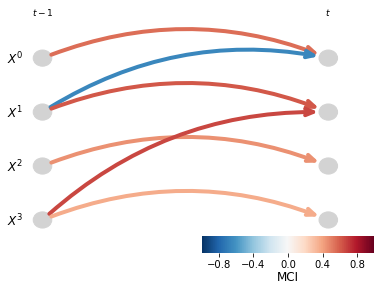

In [7]:
from ipywidgets import AppLayout, Button, Layout, VBox
from io import BytesIO
def create_expanded_button(description, button_style):
    return Button(description=description, button_style=button_style, layout=Layout(height='auto', width='auto'))

header_button = create_expanded_button('Header', 'success')
left_button = create_expanded_button('Left', 'info')
center_button = create_expanded_button('Center', 'warning')
right_button = create_expanded_button('Right', 'info')
footer_button = create_expanded_button('Footer', 'success')
run_button = widgets.Button(description="Run")

def on_button_clicked(b):
    return calculateResults(data_upload_widget.value, mask_upload_widget.value, method_widget.value, test_widget.value)

run_button.on_click(on_button_clicked)
def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        print("changed to %s" % change['new'])
        makePlot(change['new'])

plots_widget.observe(on_change)

AppLayout(header=header_button,
          left_sidebar= VBox([data_upload_widget, mask_upload_widget, method_widget, test_widget, run_button]),
          right_sidebar=VBox([plots_widget]),
          footer=footer_button)

Alte Version

In [ ]:

var_names = [r'$X^0$', r'$X^1$', r'$X^2$', r'$X^3$']
@interact_manual
def calcInput(Data=os.listdir(), Mask=example_widget, Method=["PCMCI", "PCMCI+"], Tests=["Test1", "Test2"]):
    return calculateResults(Data, Mask, Method, Tests)

@interact_manual
def showPlots(plot_type=["Process Graph", "Time series graph", "Lagged Correlation"]):
    return makePlot(plot_type.value)